In [81]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
from layers.QConv2D import QConv2D
from circuits.random import ry_random
from utils.plotter import *
from data.datahandler import datahandler
from data.datareader import datareader

import matplotlib.pyplot as plt
import pennylane as qml
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os

## Load dataset

In [83]:
dhandler = datahandler(os.path.join('datasets', 'EuroSAT'))
dhandler.print_report(name = 'EuroSAT')

Dataset EuroSAT

Class 0 - Forest               - #images: 3000
Class 1 - River                - #images: 2500
Class 2 - Highway              - #images: 2500
Class 3 - AnnualCrop           - #images: 3000
Class 4 - SeaLake              - #images: 3000
Class 5 - HerbaceousVegetation - #images: 3000
Class 6 - Industrial           - #images: 2500
Class 7 - Residential          - #images: 3000
Class 8 - PermanentCrop        - #images: 2500
Class 9 - Pasture              - #images: 2000


In [96]:
labels_mapper, x, y = dhandler.unpack(dhandler.paths)

print('Dataset Size')
print('Images   --- {}'.format(len(x)))

print('\nTraining Dataset samples')
print('X Train --- {} '.format(x[0]))
print('Y Train --- {} '.format(y[0]))

Dataset Size
Images   --- 27000

Training Dataset samples
X Train --- datasets/EuroSAT/Forest/Forest_864.jpg 
Y Train --- [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 


In [97]:
data, metadata = datareader.load(x[0])

In [98]:
(xi, yi) = next(iter(datareader.generator((x_train, y_train), 16, (64,64,3))))

In [134]:
count = np.zeros(len(y[0]))
for i, (xi,yi) in tqdm(enumerate(datareader.generator((x, y), 1, (64,64,3)))):
    if i >= len(x):
        break
    
    count[np.argmax(yi)] += 1

0it [00:00, ?it/s]

In [144]:
plt.bar?

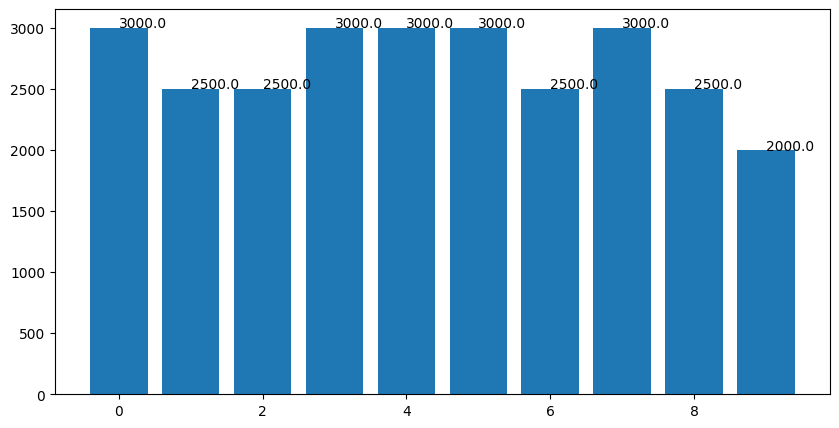

In [166]:
yy = len(y[0])
xx = np.arange(yy)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(yy, 5))
ax.bar(xx, count)
for i in range(len(count)):
    ax.text(x=i, y = count[i], s= count[i], c='black')

## Define Quantum Circuit 

In [119]:
QUBITS      = 16
KERNEL_SIZE = 3
FILTERS     = 16
N_LAYERS    = 1
STRIDE      = 2
NUM_JOBS    = 8

In [120]:
circuit = ry_random(QUBITS, KERNEL_SIZE, FILTERS, N_LAYERS)

In [121]:
drawer = qml.draw(circuit)
print(drawer(np.random.rand(QUBITS)))

 0: ──RY(1.41)─╭RandomLayers(M0)─┤  <Z>
 1: ──RY(2.67)─├RandomLayers(M0)─┤  <Z>
 2: ──RY(2.91)─├RandomLayers(M0)─┤  <Z>
 3: ──RY(1.38)─├RandomLayers(M0)─┤  <Z>
 4: ──RY(0.55)─├RandomLayers(M0)─┤  <Z>
 5: ──RY(2.45)─├RandomLayers(M0)─┤  <Z>
 6: ──RY(2.97)─├RandomLayers(M0)─┤  <Z>
 7: ──RY(2.99)─├RandomLayers(M0)─┤  <Z>
 8: ──RY(0.04)─├RandomLayers(M0)─┤  <Z>
 9: ───────────├RandomLayers(M0)─┤  <Z>
10: ───────────├RandomLayers(M0)─┤  <Z>
11: ───────────├RandomLayers(M0)─┤  <Z>
12: ───────────├RandomLayers(M0)─┤  <Z>
13: ───────────├RandomLayers(M0)─┤  <Z>
14: ───────────├RandomLayers(M0)─┤  <Z>
15: ───────────╰RandomLayers(M0)─┤  <Z>


## Quantum Convolutional 2D layer

In [122]:
conv1 = QConv2D(
    ry_random(QUBITS, KERNEL_SIZE, FILTERS, N_LAYERS),
    FILTERS, 
    KERNEL_SIZE, 
    STRIDE, 
    NUM_JOBS
)

In [123]:
(xi, yi) = next(iter(datareader.generator((x, y), 1, (64,64,3))))
img = xi[0]
out1 = conv1.apply(img, verbose = True)

  0%|          | 0/31 [00:00<?, ?it/s]

In [124]:
print('Image shape       ', img.shape)
print('QuaConv2D L1 shape', out1.shape)

Image shape        (64, 64, 3)
QuaConv2D L1 shape (31, 31, 16)


Exception ignored in: <function Widget.__del__ at 0x107f69510>
Traceback (most recent call last):
  File "/Users/asebastianelli/miniforge3/envs/quantum/lib/python3.10/site-packages/ipywidgets/widgets/widget.py", line 448, in __del__
    def __del__(self):
KeyboardInterrupt: 


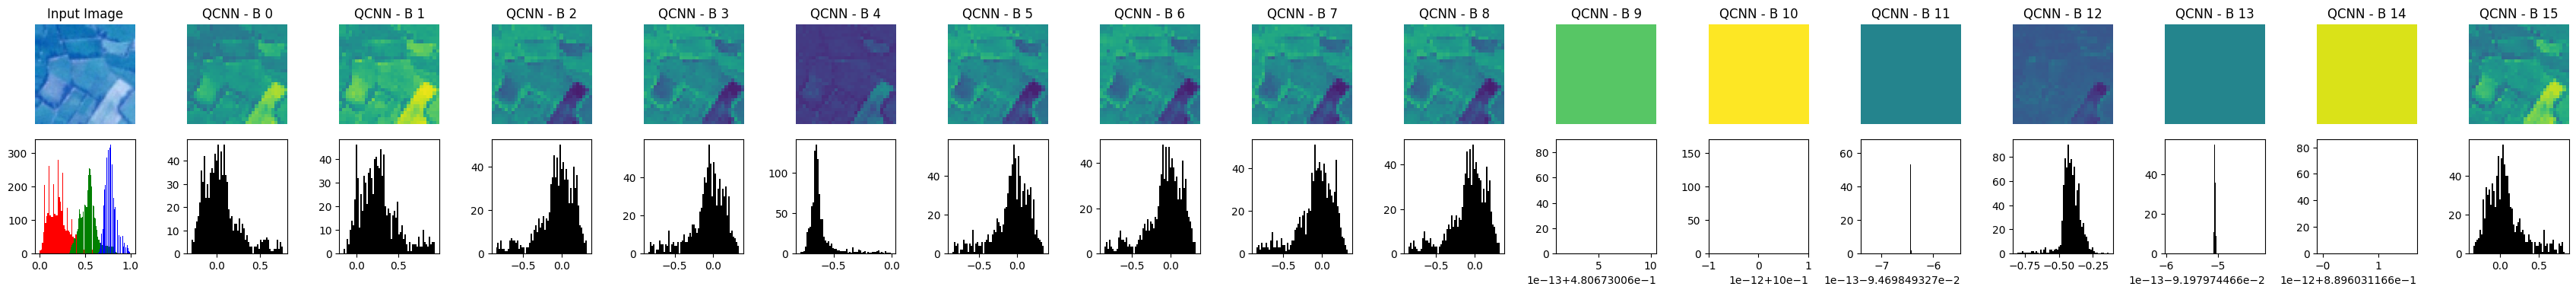

In [125]:
plot_result(img, out1)

## Quantum Preprocessing of the dataset

In [126]:
gen = iter(datareader.generator((x, y), 1, (64,64,3)))

for i in tqdm(range(len(x))):
    (xi,yi) = next(gen)
    out1 = conv1.apply(xi[0], verbose = True)
    

  0%|          | 0/27000 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

KeyboardInterrupt: 